In [1]:
import numpy as np
import camb
import hmcode
import matplotlib.pyplot as plt
%matplotlib inline 


In [2]:
hmcode.__file__

'/home/groups/risahw/chto/miniconda3/envs/newenv4/lib/python3.9/site-packages/hmcode/__init__.py'

In [3]:
0.022032/(0.12038+0.022032)

0.15470606409572227

In [8]:
# Ranges
camb.set_params(verbose=True)
k_hmcode = np.logspace(-3, 1.5, 100) # Wavenumbers [h/Mpc]
zs = [ 0.]  # Redshifts
initPower = camb.initialpower.InitialPowerLaw(As=2.215e-9, ns= 0.9619)
nonlinear = camb.nonlinear.Halofit()
nonlinear.set_params(halofit_version='mead2020_feedback')#, HMCode_logT_AGN=-20,)
# Run CAMB
#omnuh2=0.000644866570625114,
parameters = camb.CAMBparams(WantCls=False,InitPower=initPower, NonLinearModel =nonlinear, num_nu_massive=1,num_nu_massless=2.044,omnuh2=0.000644866570625114)#,,nu_mass_eigenstates = 1,share_delta_neff=True)
parameters.set_cosmology(H0=67.556, omch2=0.12038, ombh2=0.022032,omk=0, TCMB=2.725,YHe=0.24, )
parameters.set_matter_power(redshifts=zs, kmax=100.) # kmax should be much larger than the wavenumber of interest
results = camb.get_results(parameters)

# HMcode
Pk_hmcode = hmcode.power(k_hmcode, zs, results)

In [9]:
results

class: <CAMBdata>
 Params: <CAMBparams>
   WantCls = False
   WantTransfer = True
   WantScalars = True
   WantTensors = False
   WantVectors = False
   WantDerivedParameters = True
   Want_cl_2D_array = True
   Want_CMB = True
   Want_CMB_lensing = True
   DoLensing = True
   NonLinear = NonLinear_none
   Transfer: <TransferParams>
     high_precision = True
     accurate_massive_neutrinos = False
     kmax = 100.0
     k_per_logint = 0
     PK_num_redshifts = 1
     PK_redshifts = [0.0]
   want_zstar = False
   want_zdrag = False
   min_l = 2
   max_l = 2500
   max_l_tensor = 600
   max_eta_k = 5000.0
   max_eta_k_tensor = 1200.0
   ombh2 = 0.022032
   omch2 = 0.12038
   omk = 0.0
   omnuh2 = 0.0006445117284262014
   H0 = 67.556
   TCMB = 2.725
   YHe = 0.24
   num_nu_massless = 2.0293333333333337
   num_nu_massive = 1
   nu_mass_eigenstates = 1
   share_delta_neff = False
   nu_mass_degeneracies = [1.0146666666666666]
   nu_mass_fractions = [1.0]
   nu_mass_numbers = [1]
   InitPowe

In [10]:
Pk_nonlin_interp = results.get_matter_power_interpolator(nonlinear=True).P
Pk_CAMB = np.zeros(len(k_hmcode))
Pk_CAMB = Pk_nonlin_interp(zs[0], k_hmcode)

In [11]:
Pk_nonlin_interp = results.get_matter_power_interpolator(nonlinear=False).P
Pk_CAMB_lin = np.zeros(len(k_hmcode))
Pk_CAMB_lin = Pk_nonlin_interp(zs[0], k_hmcode)

In [12]:
results

class: <CAMBdata>
 Params: <CAMBparams>
   WantCls = False
   WantTransfer = True
   WantScalars = True
   WantTensors = False
   WantVectors = False
   WantDerivedParameters = True
   Want_cl_2D_array = True
   Want_CMB = True
   Want_CMB_lensing = True
   DoLensing = True
   NonLinear = NonLinear_none
   Transfer: <TransferParams>
     high_precision = True
     accurate_massive_neutrinos = False
     kmax = 100.0
     k_per_logint = 0
     PK_num_redshifts = 1
     PK_redshifts = [0.0]
   want_zstar = False
   want_zdrag = False
   min_l = 2
   max_l = 2500
   max_l_tensor = 600
   max_eta_k = 5000.0
   max_eta_k_tensor = 1200.0
   ombh2 = 0.022032
   omch2 = 0.12038
   omk = 0.0
   omnuh2 = 0.0006445117284262014
   H0 = 67.556
   TCMB = 2.725
   YHe = 0.24
   num_nu_massless = 2.0293333333333337
   num_nu_massive = 1
   nu_mass_eigenstates = 1
   share_delta_neff = False
   nu_mass_degeneracies = [1.0146666666666666]
   nu_mass_fractions = [1.0]
   nu_mass_numbers = [1]
   InitPowe

In [13]:
Pk = hmcode.power(k_hmcode, zs, results, verbose=True)

HMcode parameters
Halo mass range: 10^0.0 -> 10^18.0 Msun/h
Omega_m: 0.313
Neutrino mass fraction: 0.45%
Linear growth at z=0: 0.787

Redshift: 0.0
Scale factor: 1.0
Omega_m(z): 0.313
Un-normalisaed growth (= a for a << 1): 0.787
Normalised growth (= 1 at z = 0): 1.0
Accumulated growth (= a for a << 1): 0.933
Linear collapse threshold: 1.676
Virial halo overdensity: 302.6
Lagrangian radius range: 0.00014 -> 140.0 Mpc/h
RMS in matter field range: 15.68 -> 0.04282
Peak height range: 0.1068 -> 39.13
Non-linear Lagrangian radius: 2.484 Mpc/h
RMS in matter field at 8 Mpc/h: 0.8407
RMS in matter displacement field: 6.036 Mpc/h
Effective index at collapse scale: -1.992
Two-halo damping wavenumber; kd: 0.06885 h/Mpc
Two-halo fractional damping; f: 0.229
Two-halo damping power; nd: 2.853
One-halo damping wavenumber; k*: 0.06698 h/Mpc
Halo bloating; eta: 0.1365
Minimum halo concentration; B: 5.196
Transition smoothing; alpha: 0.7323
Rnl: 2.4840925771079587

zform: [13.14794282 13.06409988 12.980

In [14]:
interp, _, k_interp = results.get_matter_power_interpolator(nonlinear=False, 
                                                                     return_z_k=True,
                                                                     extrap_kmax=1E10)
Pk_lin_interp = interp.P
kmin = k_interp[0] # Minimum wavenumber used for the CAMB interpolator [h/Mpc]


In [15]:
kmin

7.401267066597939e-05

In [16]:
z=0
Pk_lin_interp = interp.P
sigmaV = hmcode.cosmology.sigmaV(0., lambda k: Pk_lin_interp(z, k), kmin=kmin) 

In [17]:
sigmaV

6.035892896293832

In [18]:
from classy import Class

In [19]:
import classy
classy.__file__

'/home/groups/risahw/chto/miniconda3/envs/newenv4/lib/python3.9/site-packages/classy.cpython-39-x86_64-linux-gnu.so'

In [20]:
h = 1#0.67556

In [21]:
# Ranges
camb.set_params(verbose=True)
k_hmcode = np.logspace(-3, 1.5, 100) # Wavenumbers [h/Mpc]
k = k_hmcode*h #np.logspace(-3,np.log10(30),2000)


zs = [ 0.]  # Redshifts
nonlinear = camb.nonlinear.Halofit()
nonlinear.set_params(halofit_version='mead2020_feedback',HMCode_logT_AGN=7.8)#, HMCode_logT_AGN=-20,)
pars = camb.CAMBparams(NonLinearModel =nonlinear)

#This function sets up CosmoMC-like settings, with one massive neutrino and helium set using BBN consistency
pars.set_cosmology(H0=100*h, ombh2 = 0.02225, omch2 = 0.1198, 
                   tau=0.079, num_massive_neutrinos=1, mnu=0.06,
                   standard_neutrino_neff=2.046)
pars.InitPower.set_params(As=2.2065e-9, ns=0.9645)
pars.set_for_lmax(4000, max_eta_k=12000, lens_potential_accuracy=4);
pars.set_accuracy(AccuracyBoost=3, lAccuracyBoost=3, lSampleBoost=3, DoLateRadTruncation=False )
pars.AccuratePolarization = True
pars.AccurateReionization = True
pars.YHe = 0.24
pars.omegak = 0.
#pars.set_nonlinear_lensing(True)
pars.set_matter_power(redshifts=zs, kmax=100.) # kmax should be much larger than the wavenumber of interest

results = camb.get_results(pars)

Pk_nonlin_interp = results.get_matter_power_interpolator(nonlinear=True).P
Pk_CAMB = Pk_nonlin_interp(zs[0], k_hmcode)


In [22]:
# Ranges
camb.set_params(verbose=True)
k_hmcode = np.logspace(-3, 1.5, 100) # Wavenumbers [h/Mpc]
zs = [ 0.]  # Redshifts
nonlinear = camb.nonlinear.Halofit()
nonlinear.set_params(halofit_version='mead2020')#, HMCode_logT_AGN=-20,)
pars = camb.CAMBparams(NonLinearModel =nonlinear,)

#This function sets up CosmoMC-like settings, with one massive neutrino and helium set using BBN consistency
pars.InitPower.set_params(As=2.100549e-09, ns=0.9645)
pars.set_cosmology(H0=100*h, ombh2 = 0.02225, omch2 = 0.1198, 
                   tau=0.06, num_massive_neutrinos=1, mnu=0.06,)
                  #nnu =3.046)
pars.set_for_lmax(4000, max_eta_k=12000, lens_potential_accuracy=4);
pars.set_accuracy(AccuracyBoost=3, lAccuracyBoost=3, lSampleBoost=3, DoLateRadTruncation=False )
pars.AccuratePolarization = True
pars.AccurateReionization = True
pars.YHe = 0.24
pars.omegak = 0.
#pars.set_nonlinear_lensing(True)
pars.set_matter_power(redshifts=zs, kmax=100.) # kmax should be much larger than the wavenumber of interest

results = camb.get_results(pars)

Pk_nonlin_interp = results.get_matter_power_interpolator(nonlinear=True).P

Pk_CAMB_DMonly = Pk_nonlin_interp(zs[0], k_hmcode)
Pk_nonlin_interp = results.get_matter_power_interpolator(nonlinear=False).P
Pk_CAMB_lin = Pk_nonlin_interp(zs[0], k_hmcode)

In [23]:
common_settings = {# wich output? ClTT, transfer functions delta_i and theta_i

    'output': 'mPk',
    'lensing': 'no',
    'omega_b' : 0.02225,
    'omega_cdm' : 0.1198,
    'h' : h,
     'A_s' : 2.100549e-09,
    'tau_reio' : 0.06,
    'YHe' : 0.24,
                        'non linear':"HMcode2020",

    #'halofit_k_per_decade' : 3000.,
    #'l_switch_limber' : 40.,
    #'accurate_lensing':1,
    #'num_mu_minus_lmax' : 1000.,
    #'delta_l_max' : 1000.,
#
    #"recfast_Nz0":100000,
    #"tol_thermo_integration":1.e-5,
    #"recfast_x_He0_trigger_delta" : 0.01,
    #"recfast_x_H0_trigger_delta" : 0.01,
    #"evolver":0,
    #"k_min_tau0":0.002,
    #"k_max_tau0_over_l_max":10.,
    #"k_step_sub":0.015,
    #"k_step_super":0.0001,
    #"k_step_super_reduction":0.1,
    #"start_small_k_at_tau_c_over_tau_h" : 0.0004,
    #"start_large_k_at_tau_h_over_tau_k" : 0.05,
    #"tight_coupling_trigger_tau_c_over_tau_h":0.005,
    #"tight_coupling_trigger_tau_c_over_tau_k":0.008,
    #"start_sources_at_tau_c_over_tau_h" : 0.006,
    #"l_max_g":50,
    #"l_max_pol_g":25,
    #"l_max_ur":50,
    #"tol_perturb_integration":1.e-6,
    #"perturb_sampling_stepsize":0.01,
    #"radiation_streaming_approximation" : 2,
    #"radiation_streaming_trigger_tau_over_tau_k" : 240.,
    #"radiation_streaming_trigger_tau_c_over_tau" : 100.,
    #"ur_fluid_approximation" : 2,
    #"ur_fluid_trigger_tau_over_tau_k" : 50.,
    #"ncdm_fluid_approximation" : 3,
    #"ncdm_fluid_trigger_tau_over_tau_k" : 51.,
    #"l_logstep":1.026,
    #"l_linstep":25,
    #"hyper_sampling_flat" : 12.,
    #"hyper_sampling_curved_low_nu" : 10.,
    #"hyper_sampling_curved_high_nu" : 10.,
    #"hyper_nu_sampling_step" : 10.,
    #"hyper_phi_min_abs" : 1.e-10,
    #"hyper_x_tol" : 1.e-4,
    #"hyper_flat_approximation_nu" : 1.e6,
    #"q_linstep":0.20,
    #"q_logstep_spline": 20.,
    #"q_logstep_trapzd" : 0.5,
    #"q_numstep_transition" : 250,
    #"transfer_neglect_delta_k_S_t0" : 100.,
    #"transfer_neglect_delta_k_S_t1" : 100.,
    #"transfer_neglect_delta_k_S_t2" : 100.,
    #"transfer_neglect_delta_k_S_e" : 100.,
    #"transfer_neglect_delta_k_V_t1" : 100.,
    #"transfer_neglect_delta_k_V_t2" : 100.,
    #"transfer_neglect_delta_k_V_e" : 100.,
    #"transfer_neglect_delta_k_V_b" : 100.,
    #"transfer_neglect_delta_k_T_t2" : 100.,
    #"transfer_neglect_delta_k_T_e" : 100.,
    #"transfer_neglect_delta_k_T_b" : 100.,
    #"neglect_CMB_sources_below_visibility" : 1.e-30,
    #"transfer_neglect_late_source" : 3000.,
#
    'P_k_max_1/Mpc':40,
    'hmcode2020log10tagn':7.8,
    'N_ur':2.046,
    'N_ncdm':1,
    'm_ncdm' : 0.06
}
cosmo = Class()
cosmo.set(common_settings)
cosmo.compute()
pkclass = np.array([cosmo.pk(ki,0) for ki in k])



# 

In [26]:
common_settings = {# wich output? ClTT, transfer functions delta_i and theta_i

    'output': 'mPk',
    'lensing': 'no',
    'omega_b' : 0.02225,
    'omega_cdm' : 0.1198,
    'h' : h,
     'A_s' : 2.100549e-09,
    'n_s' : 0.9645,
    'tau_reio' : 0.06,
    'YHe' : 0.24,
    'non linear':"HMcode2020",

    #'halofit_k_per_decade' : 3000.,
    'l_switch_limber' : 40.,
    'accurate_lensing':1,
    'num_mu_minus_lmax' : 1000.,
    'delta_l_max' : 1000.,

    "recfast_Nz0":100000,
    "tol_thermo_integration":1.e-5,
    "recfast_x_He0_trigger_delta" : 0.01,
    "recfast_x_H0_trigger_delta" : 0.01,
    "evolver":0,
    "k_min_tau0":0.002,
    "k_max_tau0_over_l_max":10.,
    "k_step_sub":0.015,
    "k_step_super":0.0001,
    "k_step_super_reduction":0.1,
    "start_small_k_at_tau_c_over_tau_h" : 0.0004,
    "start_large_k_at_tau_h_over_tau_k" : 0.05,
    "tight_coupling_trigger_tau_c_over_tau_h":0.005,
    "tight_coupling_trigger_tau_c_over_tau_k":0.008,
    "start_sources_at_tau_c_over_tau_h" : 0.006,
    "l_max_g":50,
    "l_max_pol_g":25,
    "l_max_ur":50,
    "tol_perturb_integration":1.e-6,
    "perturb_sampling_stepsize":0.01,
    "radiation_streaming_approximation" : 2,
    "radiation_streaming_trigger_tau_over_tau_k" : 240.,
    "radiation_streaming_trigger_tau_c_over_tau" : 100.,
    "ur_fluid_approximation" : 2,
    "ur_fluid_trigger_tau_over_tau_k" : 50.,
    "ncdm_fluid_approximation" : 3,
    "ncdm_fluid_trigger_tau_over_tau_k" : 51.,
    "l_logstep":1.026,
    "l_linstep":25,
    "hyper_sampling_flat" : 12.,
    "hyper_sampling_curved_low_nu" : 10.,
    "hyper_sampling_curved_high_nu" : 10.,
    "hyper_nu_sampling_step" : 10.,
    "hyper_phi_min_abs" : 1.e-10,
    "hyper_x_tol" : 1.e-4,
    "hyper_flat_approximation_nu" : 1.e6,
    "q_linstep":0.20,
    "q_logstep_spline": 20.,
    "q_logstep_trapzd" : 0.5,
    "q_numstep_transition" : 250,
    "transfer_neglect_delta_k_S_t0" : 100.,
    "transfer_neglect_delta_k_S_t1" : 100.,
    "transfer_neglect_delta_k_S_t2" : 100.,
    "transfer_neglect_delta_k_S_e" : 100.,
    "transfer_neglect_delta_k_V_t1" : 100.,
    "transfer_neglect_delta_k_V_t2" : 100.,
    "transfer_neglect_delta_k_V_e" : 100.,
    "transfer_neglect_delta_k_V_b" : 100.,
    "transfer_neglect_delta_k_T_t2" : 100.,
    "transfer_neglect_delta_k_T_e" : 100.,
    "transfer_neglect_delta_k_T_b" : 100.,
    "neglect_CMB_sources_below_visibility" : 1.e-30,
    "transfer_neglect_late_source" : 3000.,
    'P_k_max_1/Mpc':40,
                    #'hmcode2020log10tagn':7.8
    'T_ncdm': 0.7133,  # IMPORTANT, see page 11 of arxiv:1104.2935
    'N_ur':2.0308,
    'N_ncdm':1,
    'm_ncdm' : 0.06,
              'ncdm_fluid_approximation':3,
    #'nonlinear_verbose' = 2
}
cosmo = Class()
cosmo.set(common_settings)
cosmo.compute()
pkclass_dm = np.array([cosmo.pk(ki,0) for ki in k])
pkclass_lin = np.array([cosmo.pk_lin(ki,0) for ki in k])


In [24]:
plt.semilogx(k/h,(pkclass_lin*h**3)/Pk_CAMB_lin-1, label="linear")


NameError: name 'pkclass_lin' is not defined

In [ ]:
plt.loglog(k/h,Pk_CAMB, label="camb")
plt.loglog(k/h,(pkclass*h**3))
plt.legend()

In [ ]:
plt.loglog(k/h,Pk_CAMB_DMonly, label="camb dm")
plt.loglog(k/h,(pkclass_dm*h**3))
plt.legend()

In [ ]:
cosmo = Class()
cosmo.set(common_settings)
cosmo.compute()
pkclass = np.array([cosmo.pk(ki,0) for ki in k])

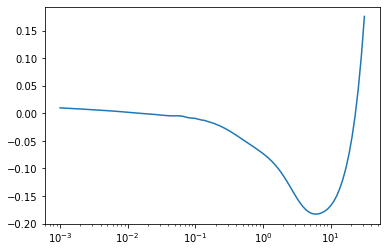

In [27]:
plt.semilogx(k/h,(pkclass*h**3)/(pkclass_dm*h**3)-1, label="hmcode class")


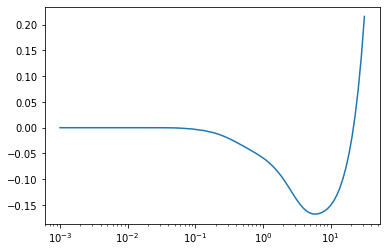

In [27]:
plt.semilogx(k/h,(Pk_CAMB)/(Pk_CAMB_DMonly)-1, label="hmcode class")


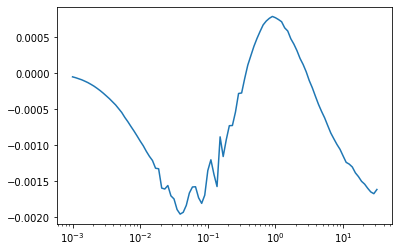

In [28]:
plt.semilogx(k/h,(pkclass_dm*h**3)/(Pk_CAMB_DMonly)-1, label="hmcode class")


Text(0.5, 0, '')

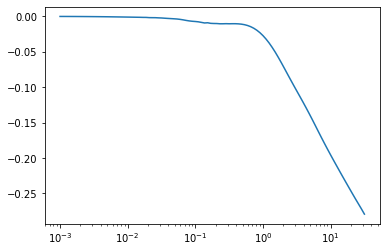

In [29]:
plt.semilogx(k/h,(pkclass*h**3)/Pk_CAMB-1, label="hmcode class")
plt.xlabel("")

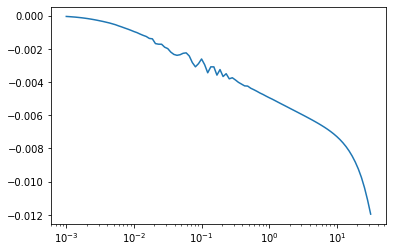

In [30]:
#plt.ylim(-2.5E-3,1E-3)
#plt.semilogx(k/h,Pk_hmcode[0]/Pk_CAMB-1, label="hmcode class")

In [32]:
common_settings

{'output': 'mPk',
 'lensing': 'no',
 'omega_b': 0.02225,
 'omega_cdm': 0.1198,
 'h': 1,
 'A_s': 2.100549e-09,
 'n_s': 0.9645,
 'tau_reio': 0.06,
 'YHe': 0.24,
 'non linear': 'HMcode2020',
 'l_switch_limber': 40.0,
 'accurate_lensing': 1,
 'num_mu_minus_lmax': 1000.0,
 'delta_l_max': 1000.0,
 'recfast_Nz0': 100000,
 'tol_thermo_integration': 1e-05,
 'recfast_x_He0_trigger_delta': 0.01,
 'recfast_x_H0_trigger_delta': 0.01,
 'evolver': 0,
 'k_min_tau0': 0.002,
 'k_max_tau0_over_l_max': 10.0,
 'k_step_sub': 0.015,
 'k_step_super': 0.0001,
 'k_step_super_reduction': 0.1,
 'start_small_k_at_tau_c_over_tau_h': 0.0004,
 'start_large_k_at_tau_h_over_tau_k': 0.05,
 'tight_coupling_trigger_tau_c_over_tau_h': 0.005,
 'tight_coupling_trigger_tau_c_over_tau_k': 0.008,
 'start_sources_at_tau_c_over_tau_h': 0.006,
 'l_max_g': 50,
 'l_max_pol_g': 25,
 'l_max_ur': 50,
 'tol_perturb_integration': 1e-06,
 'perturb_sampling_stepsize': 0.01,
 'radiation_streaming_approximation': 2,
 'radiation_streaming_tri

In [59]:
common_settings = {# wich output? ClTT, transfer functions delta_i and theta_i

    'output': 'mPk',
    'lensing': 'no',
    'omega_b' : 0.02225,
    'omega_cdm' : 0.1198,
    'h' : h,
     'A_s' : 2.100549e-09,
    'tau_reio' : 0.06,
    'YHe' : 0.24,
                        'non linear':"HMcode2020",

    #'halofit_k_per_decade' : 3000.,
    #'l_switch_limber' : 40.,
    #'accurate_lensing':1,
    #'num_mu_minus_lmax' : 1000.,
    #'delta_l_max' : 1000.,
#
    #"recfast_Nz0":100000,
    #"tol_thermo_integration":1.e-5,
    #"recfast_x_He0_trigger_delta" : 0.01,
    #"recfast_x_H0_trigger_delta" : 0.01,
    #"evolver":0,
    #"k_min_tau0":0.002,
    #"k_max_tau0_over_l_max":10.,
    #"k_step_sub":0.015,
    #"k_step_super":0.0001,
    #"k_step_super_reduction":0.1,
    #"start_small_k_at_tau_c_over_tau_h" : 0.0004,
    #"start_large_k_at_tau_h_over_tau_k" : 0.05,
    #"tight_coupling_trigger_tau_c_over_tau_h":0.005,
    #"tight_coupling_trigger_tau_c_over_tau_k":0.008,
    #"start_sources_at_tau_c_over_tau_h" : 0.006,
    #"l_max_g":50,
    #"l_max_pol_g":25,
    #"l_max_ur":50,
    #"tol_perturb_integration":1.e-6,
    #"perturb_sampling_stepsize":0.01,
    #"radiation_streaming_approximation" : 2,
    #"radiation_streaming_trigger_tau_over_tau_k" : 240.,
    #"radiation_streaming_trigger_tau_c_over_tau" : 100.,
    #"ur_fluid_approximation" : 2,
    #"ur_fluid_trigger_tau_over_tau_k" : 50.,
    #"ncdm_fluid_approximation" : 3,
    #"ncdm_fluid_trigger_tau_over_tau_k" : 51.,
    #"l_logstep":1.026,
    #"l_linstep":25,
    #"hyper_sampling_flat" : 12.,
    #"hyper_sampling_curved_low_nu" : 10.,
    #"hyper_sampling_curved_high_nu" : 10.,
    #"hyper_nu_sampling_step" : 10.,
    #"hyper_phi_min_abs" : 1.e-10,
    #"hyper_x_tol" : 1.e-4,
    #"hyper_flat_approximation_nu" : 1.e6,
    #"q_linstep":0.20,
    #"q_logstep_spline": 20.,
    #"q_logstep_trapzd" : 0.5,
    #"q_numstep_transition" : 250,
    #"transfer_neglect_delta_k_S_t0" : 100.,
    #"transfer_neglect_delta_k_S_t1" : 100.,
    #"transfer_neglect_delta_k_S_t2" : 100.,
    #"transfer_neglect_delta_k_S_e" : 100.,
    #"transfer_neglect_delta_k_V_t1" : 100.,
    #"transfer_neglect_delta_k_V_t2" : 100.,
    #"transfer_neglect_delta_k_V_e" : 100.,
    #"transfer_neglect_delta_k_V_b" : 100.,
    #"transfer_neglect_delta_k_T_t2" : 100.,
    #"transfer_neglect_delta_k_T_e" : 100.,
    #"transfer_neglect_delta_k_T_b" : 100.,
    #"neglect_CMB_sources_below_visibility" : 1.e-30,
    #"transfer_neglect_late_source" : 3000.,
#
    'P_k_max_1/Mpc':40,
    'N_ur':2.046,
    'N_ncdm':1,
    'm_ncdm' : 0.06
}

In [60]:
common_settings

{'output': 'mPk',
 'lensing': 'no',
 'omega_b': 0.02225,
 'omega_cdm': 0.1198,
 'h': 1,
 'A_s': 2.100549e-09,
 'tau_reio': 0.06,
 'YHe': 0.24,
 'non linear': 'HMcode2020',
 'P_k_max_1/Mpc': 40,
 'N_ur': 2.046,
 'N_ncdm': 1,
 'm_ncdm': 0.06}

In [61]:
cosmo = Class()
cosmo.set(common_settings)
cosmo.compute()
pkclass_dm = np.array([cosmo.pk(ki,0) for ki in k])


In [62]:
pdict = {}
from copy import deepcopy as copy
for Tagn in np.linspace(7.8,8.4,10):
    common_settings_in=copy(common_settings)
    common_settings_in['hmcode2020log10tagn']=Tagn
    cosmo = Class()
    cosmo.set(common_settings_in)
    cosmo.compute()
    pkclass = np.array([cosmo.pk(ki,0) for ki in k])
    pdict[Tagn]=pkclass

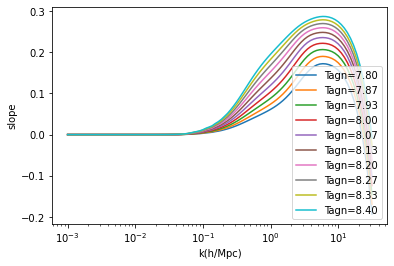

In [64]:
for Tagn in np.linspace(7.8,8.4,10):
    plt.semilogx(k/h,1-(pdict[Tagn]*h**3)/(pkclass_dm*h**3), label="Tagn={0:.2f}".format(Tagn))
plt.ylabel("slope")
plt.xlabel("k(h/Mpc)")
plt.legend()
#plt.ylim(0,3)
#plt.ylim(5E-3, 2E-1)


<ipython-input-66-63b8ec7f732d>:2: RuntimeWarning: invalid value encountered in log
  dy = np.gradient(np.log(1-(pdict[Tagn]*h**3)/(pkclass_dm*h**3)))
<ipython-input-66-63b8ec7f732d>:2: RuntimeWarning: invalid value encountered in log
  dy = np.gradient(np.log(1-(pdict[Tagn]*h**3)/(pkclass_dm*h**3)))
<ipython-input-66-63b8ec7f732d>:2: RuntimeWarning: invalid value encountered in log
  dy = np.gradient(np.log(1-(pdict[Tagn]*h**3)/(pkclass_dm*h**3)))
<ipython-input-66-63b8ec7f732d>:2: RuntimeWarning: invalid value encountered in log
  dy = np.gradient(np.log(1-(pdict[Tagn]*h**3)/(pkclass_dm*h**3)))
<ipython-input-66-63b8ec7f732d>:2: RuntimeWarning: invalid value encountered in log
  dy = np.gradient(np.log(1-(pdict[Tagn]*h**3)/(pkclass_dm*h**3)))
<ipython-input-66-63b8ec7f732d>:2: RuntimeWarning: invalid value encountered in log
  dy = np.gradient(np.log(1-(pdict[Tagn]*h**3)/(pkclass_dm*h**3)))
<ipython-input-66-63b8ec7f732d>:2: RuntimeWarning: invalid value encountered in log
  dy = np.

(0.0, 3.0)

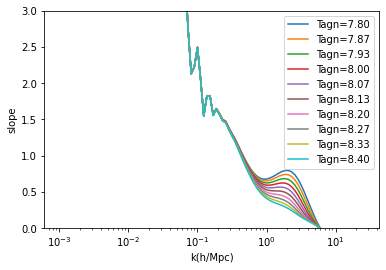

In [66]:
for Tagn in np.linspace(7.8,8.4,10):
    dy = np.gradient(np.log(1-(pdict[Tagn]*h**3)/(pkclass_dm*h**3)))
    dx = np.gradient(np.log(k/h))
    plt.semilogx(k/h,dy/dx, label="Tagn={0:.2f}".format(Tagn))
plt.ylabel("slope")
plt.xlabel("k(h/Mpc)")
plt.legend()
plt.ylim(0,3)
#plt.ylim(5E-3, 2E-1)


In [1]:
import astropy

In [5]:
from astropy.cosmology import Planck15
import numpy as np

In [12]:
x=np.linspace(0,2,200)
def integrand(z):
    return Planck15.differential_comoving_volume(z)*(5000)*(np.pi/180)**2/(4*np.pi)
from scipy.integrate import trapz
trapz(integrand(x),x)/1E9*0.7**3

<Quantity 2.07658176 Mpc3 / sr>